In [1]:
pip install pycocotools

     ---------------------------------------- 84.5/84.5 kB 4.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [43]:
import matplotlib.pyplot as plt
import json
import cv2
import random
from pycocotools.coco import COCO
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [4]:
dataDir='data/coco'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [5]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.92s)
creating index...
index created!


In [ ]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

In [6]:
# display COCO categories and supercategories

cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
outdoor animal accessory vehicle indoor person furniture electronic food appliance sports kitchen


In [67]:
# Define category person and get IDs of that category

catIds = coco.getCatIds(catNms='person');
imgIds = coco.getImgIds(catIds=catIds)

# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
# coco_caps.showAnns(anns)

# words to check in caption
words = ['street', 'road', 'city']

# Filter images with at least one bounding box annotation
filtered_imgIds = []
for img_id in imgIds:
    annIds = coco.getAnnIds(imgIds=img_id, iscrowd=None)
    anns = coco.loadAnns(annIds)
    if any(ann['bbox'] for ann in anns):
        # filtered_imgIds.append(img_id)
    

        # Filter images with at least one caption containing the words above
        capIds = coco_caps.getAnnIds(imgIds=img_id)
        caps = coco_caps.loadAnns(capIds)
        for cap in caps:
            caption = cap['caption'].lower()
            if any(word in caption for word in words):
                filtered_imgIds.append(img_id)
                break
    

len(filtered_imgIds)

468

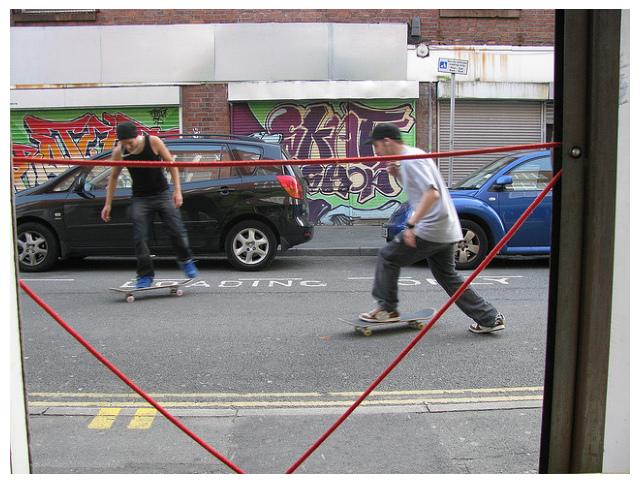

In [83]:
# Get random image
random_img_id = random.choice(filtered_imgIds)

# Initialize random image
img = coco.loadImgs(random_img_id)[0]

# Load the image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

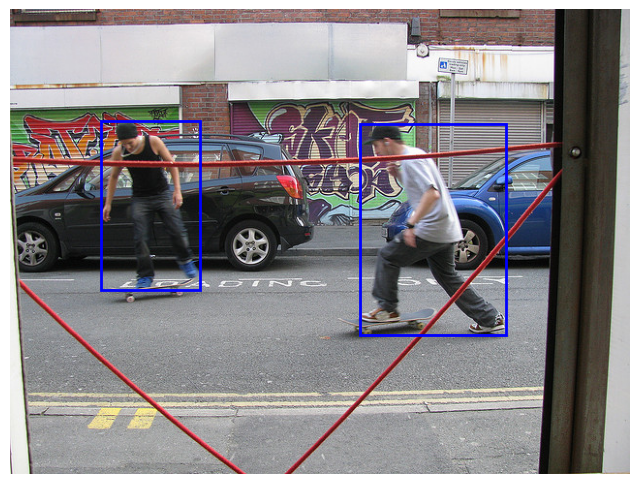

In [84]:
# Plot only person bounding boxes

import matplotlib.patches as patches

fig, ax = plt.subplots()
ax.imshow(I)

annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=None, catIds=catIds[0])
anns = coco.loadAnns(annIds)

for ann in anns:
    box = ann['bbox']
    bb = patches.Rectangle((box[0], box[1]), box[2], box[3], linewidth=2, edgecolor="blue", facecolor="none")
    ax.add_patch(bb)

plt.axis('off')
plt.show()